In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

from src.data_processing import open_mfdataset

In [22]:
ripple_info = open_mfdataset(
    '../Processed-Data/*.nc', concat_dim='session', group='/ripple_info'
).to_dataframe().set_index(['animal', 'day', 'epoch']).dropna()

ripple_info.head(5)

ripple_number ripple_trajectory ripple_direction  \
animal day epoch                                                     
HPa    1.0 4.0              1.0           inbound          forward   
           6.0              1.0           inbound          forward   
       2.0 2.0              1.0          outbound          reverse   
           4.0              1.0          outbound          forward   
       3.0 2.0              1.0          outbound          reverse   

                  ripple_state_probability  ripple_start_time  \
animal day epoch                                                
HPa    1.0 4.0                    0.802458        5868.271933   
           6.0                    0.559703        7922.208633   
       2.0 2.0                    0.373818        5111.931600   
           4.0                    0.619574        7067.240267   
       3.0 2.0                    0.768765        2670.668767   

                  ripple_end_time  number_of_unique_neurons_spiking  \
animal day epoch                                                      
HPa    1.0 4.0        5868.376600                               9.0   
           6.0        7922.244633                              13.0   
       2.0 2.0        5111.976933                              13.0   
           4.0        7067.292933                              12.0   
       3.0 2.0        2670.733433                              11.0   

                  number_of_spikes session_time is_spike trajectory_direction  \
animal day epoch                                                                
HPa    1.0 4.0               112.0        early  isSpike             Outbound   
           6.0                30.0        early  isSpike             Outbound   
       2.0 2.0                49.0        early  isSpike              Inbound   
           4.0                73.0        early  isSpike             Outbound   
       3.0 2.0                98.0        early  isSpike             Outbound   

                 trajectory_turn  trial_number  linear_distance  x_position  \
animal day epoch                                                              
HPa    1.0 4.0              Left           1.0         1.434215   97.405855   
           6.0              Left           1.0        22.296597   88.617349   
       2.0 2.0             Right           1.0         3.407460   63.790082   
           4.0              Left           1.0        32.876066   84.889633   
       3.0 2.0              Left           1.0        73.730578   98.949674   

                  y_position  head_direction     speed  linear_position  \
animal day epoch                                                          
HPa    1.0 4.0     94.164243        0.967537  2.024030         1.370102   
           6.0     73.793936        2.652760  0.669837        22.301850   
       2.0 2.0     73.364576        1.807549  0.852658         3.400485   
           4.0     44.437216       -1.556696  2.089386        32.978906   
       3.0 2.0     24.943667       -2.400347  3.739987        73.811897   

                 ripple_motion  
animal day epoch                
HPa    1.0 4.0         towards  
           6.0         towards  
       2.0 2.0            away  
           4.0         towards  
       3.0 2.0         towards

In [23]:
ripple_info['ripple_duration'] = ripple_info.ripple_end_time - ripple_info.ripple_start_time

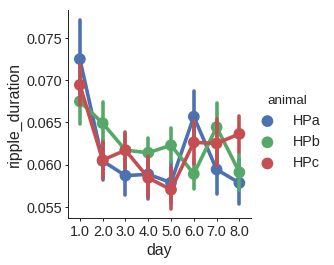

In [26]:
sns.factorplot(x='day', y='ripple_duration', hue='animal',
              data=ripple_info.reset_index());

In [45]:
thresholded_ripple_info = ripple_info.loc[ripple_info.ripple_state_probability >= 0.8].reset_index()
thresholded_ripple_info.columns

Index(['animal', 'day', 'epoch', 'ripple_number', 'ripple_trajectory',
       'ripple_direction', 'ripple_state_probability', 'ripple_start_time',
       'ripple_end_time', 'number_of_unique_neurons_spiking',
       'number_of_spikes', 'session_time', 'is_spike', 'trajectory_direction',
       'trajectory_turn', 'trial_number', 'linear_distance', 'x_position',
       'y_position', 'head_direction', 'speed', 'linear_position',
       'ripple_motion', 'ripple_duration'],
      dtype='object')

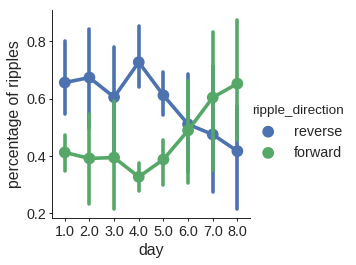

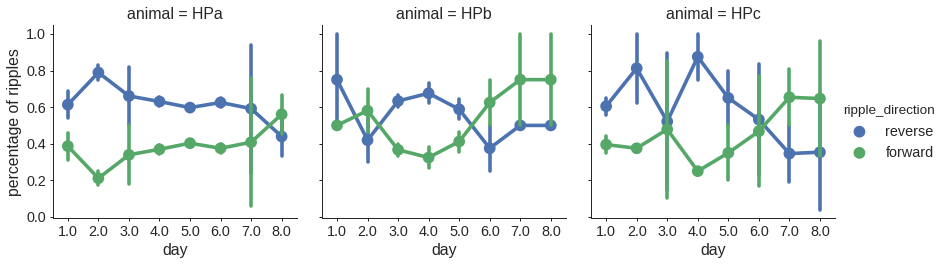

In [42]:
covariate = 'ripple_direction'
percentage_of_ripples = (thresholded_ripple_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');

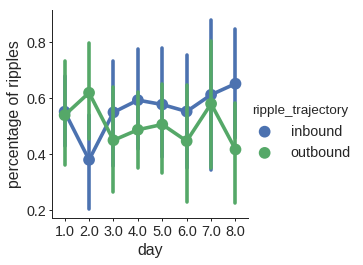

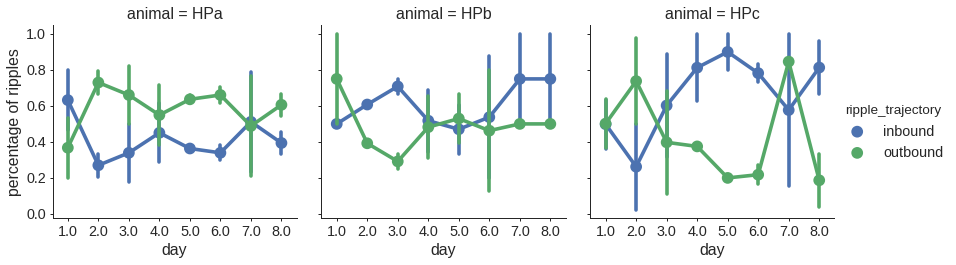

In [43]:
covariate = 'ripple_trajectory'
percentage_of_ripples = (thresholded_ripple_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');

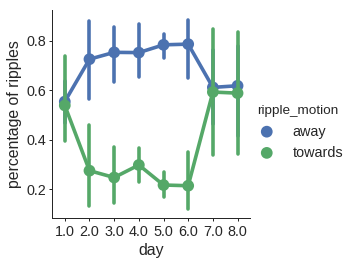

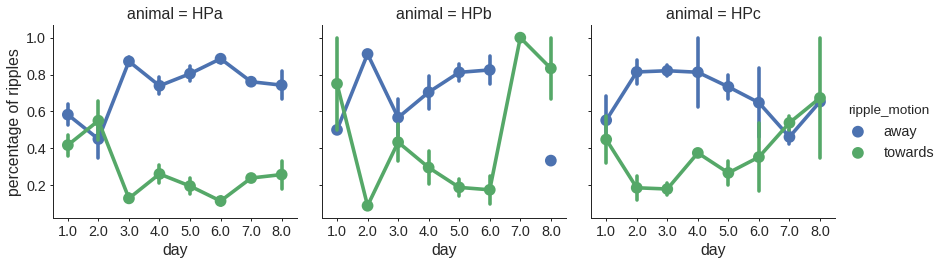

In [44]:
covariate = 'ripple_motion'
percentage_of_ripples = (thresholded_ripple_info
 .groupby(['animal', 'day', 'epoch'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue=covariate, col='animal');

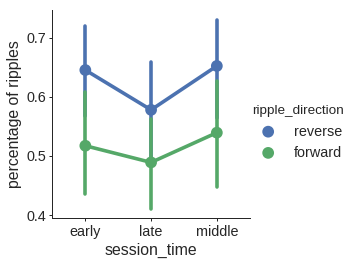

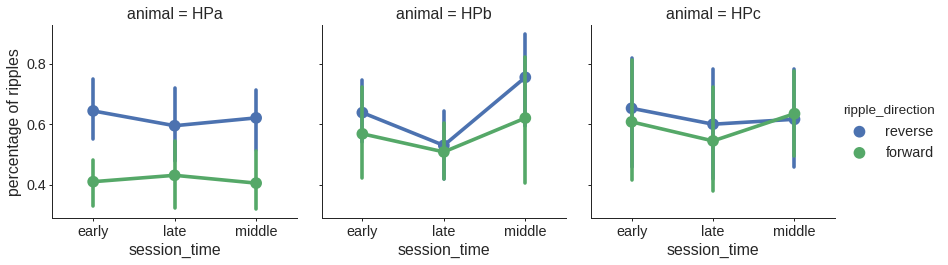

In [46]:
covariate = 'ripple_direction'
percentage_of_ripples = (thresholded_ripple_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, col='animal');

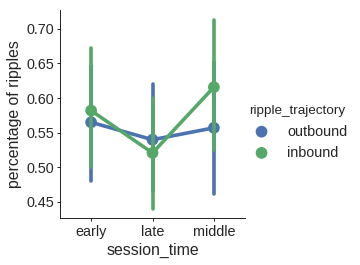

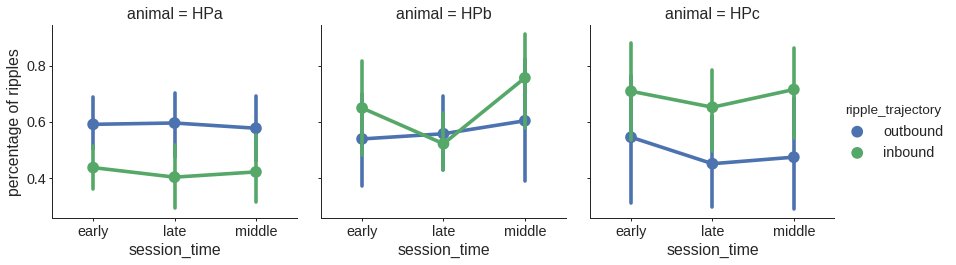

In [47]:
covariate = 'ripple_trajectory'
percentage_of_ripples = (thresholded_ripple_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, col='animal');

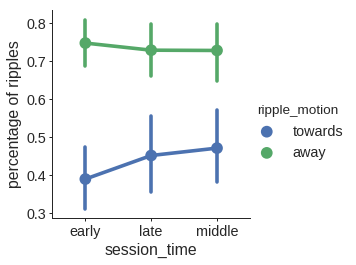

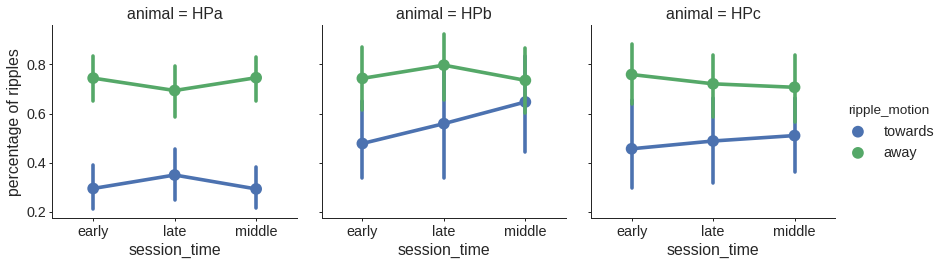

In [48]:
covariate = 'ripple_motion'
percentage_of_ripples = (thresholded_ripple_info
 .groupby(['animal', 'day', 'epoch', 'session_time'])[covariate].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate);
sns.factorplot(data=percentage_of_ripples, x='session_time', y='percentage of ripples', hue=covariate, col='animal');

In [66]:
from src.parameters import ANIMALS, N_DAYS
from src.data_processing import get_interpolated_position_dataframe, make_epochs_dataframe

epoch_info = make_epochs_dataframe(ANIMALS, range(1, N_DAYS + 1))
epoch_keys = epoch_info[(epoch_info.type == 'run') & (
    epoch_info.environment != 'lin')].index

linear_distance = {epoch_key: get_interpolated_position_dataframe(epoch_key, ANIMALS).linear_distance
 for epoch_key in epoch_keys}

In [67]:
pd.concat(linear_distance)

           time        
HPa  1  4  5865.112600       1.296898
           5865.113267       1.296898
           5865.113933       1.296898
           5865.114600       1.296898
           5865.115267       1.296898
           5865.115933       1.296898
           5865.116600       1.296898
           5865.117267       1.296898
           5865.117933       1.296898
           5865.118600       1.296898
           5865.119267       1.296898
           5865.119933       1.296898
           5865.120600       1.296898
           5865.121267       1.296898
           5865.121933       1.296898
           5865.122600       1.296898
           5865.123267       1.296898
           5865.123933       1.296898
           5865.124600       1.296898
           5865.125267       1.296898
           5865.125933       1.296898
           5865.126600       1.296898
           5865.127267       1.296898
           5865.127933       1.296898
           5865.128600       1.296898
           5865.129267    